# My (Second) First Notebook:
Oh well, I tried to do a simple notebook to identify different characters from the strawhats. But it failed, and got so convoluted that I figured I might as well clean up everything and start from scratch. So here goes.

The process to create a deep-learning model for images seems to be roughly the following
1. Find images to train the model on (obviously this will vary based on the problem)
2. Validate the images and label them somehow. (One way is to simply arrange them in folders)
3. If you got a lot of money and data, train your own model from scratch with super powerful computers **OR** If you're everyone else, use a pretrained model and fine-tune it for your purposes.
4. Test the model
5. If it works, enjoy as this model can be used like pretty much any other standard function. If not starts debugging time. And maybe reconsider if AI is the best solution for your issue.

# Step 1 : Find images
Since I am really building this as a mean to test the technology, I will simply nerd out. I want to create a model which can precisely identify characters from One Piece, 
more specifically characters from the Mugiwaras. 

As of (2023-10-23), this means:
- Luffy (Captain)
- Zoro (Vice-Captain)
- Nami (Navigator)
- Usopp (Sharpshooter)
- Sanji (Cook)
- Chopper (Doctor)
- Robin (Mom)
- Franky (Shipwright)
- Brook (Musician)
- Jinbei (Helmsman)

# 0. Install what needs to be installed.

In [1]:
!pip install duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 22.1.0
    Uninstalling aiofiles-22.1.0:
      Successfully uninstalled aiofiles-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


# 1. Download and Verify the Images

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *
import os

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')
def verify_downloaded_images(directory):
    
    for filename in directory:
        img_path = Path(os.path.join(directory, filename))
        verify(img_path)

In [4]:
from fastai.vision.all import *
from fastcore.all import *
import os
#We will search all the elements of this list. To make them distinctive, monikers were added.
theMugiwaras = "Monkey D Luffy", "Roronoa Zoro", "Nami, the cat burglar", "Usopp", "Sanji Vinsmoke", "Nico Robin", "Tony Tony Chopper", "Brook, the Soul King", "Franky, Cyborg", "Jinbei"
parent_directory = Path("theMugiwaras")
parent_directory.mkdir(exist_ok=True, parents=True)
for member in theMugiwaras:
    member_directory = Path(os.path.join(parent_directory,member))
    member_directory.mkdir(exist_ok=True, parents=True)
    download_images(member_directory,urls=search_images(member + " -cosplay -fanart -teentitans", 50))
    download_images(member_directory,urls=search_images(member + " happy -teentitans", 50))
    download_images(member_directory,urls=search_images(member + " manga -cosplay -fanart -teentitans", 50))
    download_images(member_directory,urls=search_images(member + " angry -cosplay -fanart -teentitans", 50))
    download_images(member_directory,urls=search_images(member + " post timeskip -teentitans", 50))
    download_images(member_directory,urls=search_images(member + " liveaction -cosplay -fanart -teentitans", 50))
    
    

Searching for 'Monkey D Luffy -cosplay -fanart'


/opt/conda/lib/python3.10/site-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


Searching for 'Monkey D Luffy happy'
Searching for 'Monkey D Luffy manga -cosplay -fanart'
Searching for 'Monkey D Luffy angry -cosplay -fanart'
Searching for 'Monkey D Luffy post timeskip'
Searching for 'Monkey D Luffy liveaction -cosplay -fanart'
Searching for 'Roronoa Zoro -cosplay -fanart'
Searching for 'Roronoa Zoro happy'
Searching for 'Roronoa Zoro manga -cosplay -fanart'
Searching for 'Roronoa Zoro angry -cosplay -fanart'
Searching for 'Roronoa Zoro post timeskip'
Searching for 'Roronoa Zoro liveaction -cosplay -fanart'
Searching for 'Nami, the cat burglar -cosplay -fanart'
Searching for 'Nami, the cat burglar happy'
Searching for 'Nami, the cat burglar manga -cosplay -fanart'
Searching for 'Nami, the cat burglar angry -cosplay -fanart'
Searching for 'Nami, the cat burglar post timeskip'
Searching for 'Nami, the cat burglar liveaction -cosplay -fanart'
Searching for 'Usopp -cosplay -fanart'
Searching for 'Usopp happy'
Searching for 'Usopp manga -cosplay -fanart'
Searching for '

Then after we're done downloading, we use the fastai provided methods to quickly get rid of any image invalid images.

In [5]:
invalid_images = verify_images(get_image_files(parent_directory))
invalid_images.map(Path.unlink)
len(invalid_images)

174

# 2. We train the model

First we create a dataloader for it.

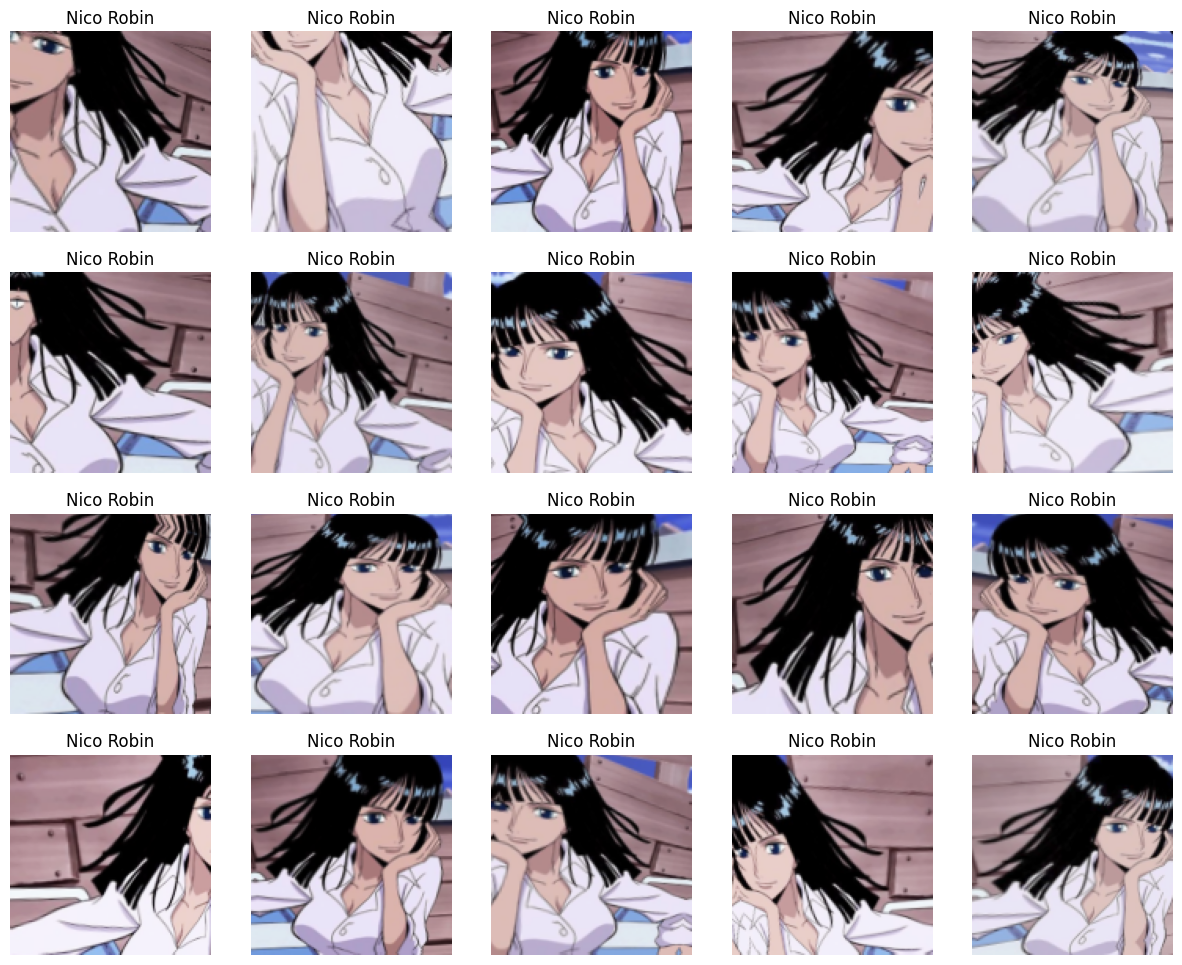

In [136]:
#Create a dataloader
dataloader = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3),
    batch_tfms=aug_transforms()
).dataloaders(parent_directory, bs=32)

dataloader.show_batch(max_n=20, unique=True)

And then we make a learner, learn on our dataset.

In [138]:
learn = vision_learner(dataloader, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.310004,0.993519,0.314978,00:35


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,1.317030,0.769119,0.257709,00:33
1,1.056262,0.599621,0.180617,00:35
2,0.861132,0.485709,0.147577,00:34
3,0.651942,0.455685,0.143172,00:35
4,0.505237,0.395728,0.116740,00:33
5,0.429963,0.311285,0.092511,00:35
6,0.337680,0.363129,0.101322,00:34
7,0.272210,0.334623,0.103524,00:28
8,0.242855,0.332727,0.094714,00:27
9,0.247140,0.319157,0.090308,00:27


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes sh

# Test
It seems, our learner didn't learn super well. After all it's loss is considerable even after 10 epochs. Barely better than a coin toss. Still for fun, let's try passing a random file to it.

(Edit: I modified a few datablock settings after watching/reading lesson 2, and trying to augment the limited data I have. Didn't have time to test model anew, hopefully this helps a bit.)

In [139]:
print(learn.predict("/kaggle/working/theMugiwaras/Brook, the Soul King/9049c99a-9739-43ab-abc4-d71a7b566cc1.jpg"))
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("/kaggle/working/theMugiwaras/Brook, the Soul King/9049c99a-9739-43ab-abc4-d71a7b566cc1.jpg")
imgplot = plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/theMugiwaras/Brook, the Soul King/9049c99a-9739-43ab-abc4-d71a7b566cc1.jpg'

The above is not too readable, but it seems it correctly identifies Brook! So, not bad Ai. Is there anything we can do to help our model get better? Well let's try to clean up the data. Now that we got a working model, we can use the model to sort the data and we can then correct false associations.

Further utilities to have an idea of where exactly it typically messes up.

### Confusion Matrix

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


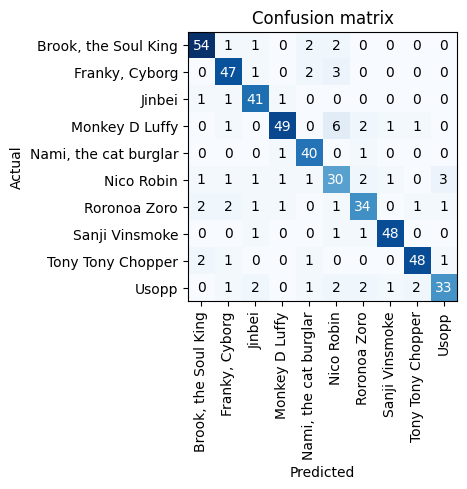

In [109]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Sort Images By Loss

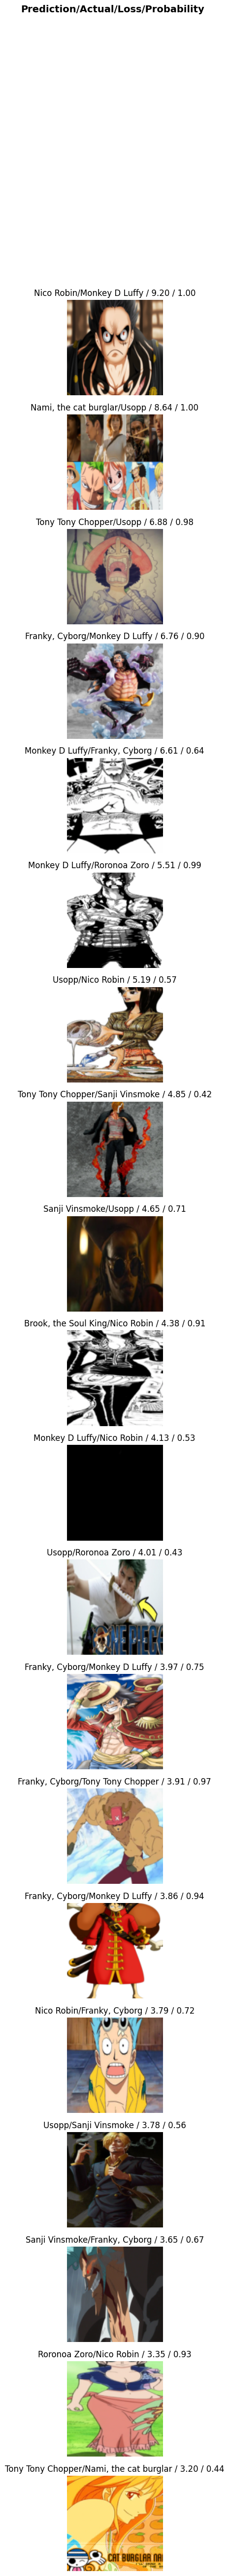

In [92]:
interp.plot_top_losses(20, nrows=20)
     

In [135]:
#!pip install jmd_imagescraper
from jmd_imagescraper.core import *
from jmd_imagescraper.imagecleaner import *

display_image_cleaner("/kaggle/working/theMugiwaras")

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [110]:
from fastai.vision.widgets import *

cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [120]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
print("done")

done


In [140]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.1 MB/s eta 0:00:00a 0:00:01
Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.5.4 OK


In [141]:
learn.export()

In [142]:
#Check the file exists (I mean in this case I can see it)
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [202]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload



FileUpload(value={}, description='Upload')

In [203]:
img = PILImage.create(btn_upload.data[-1])

In [204]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [206]:
pred,pred_idx,probs = learn.predict(img)

In [207]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Roronoa Zoro; Probability: 0.9908')

In [169]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

In [219]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
     
     

In [223]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [224]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [225]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.5.4 OK
